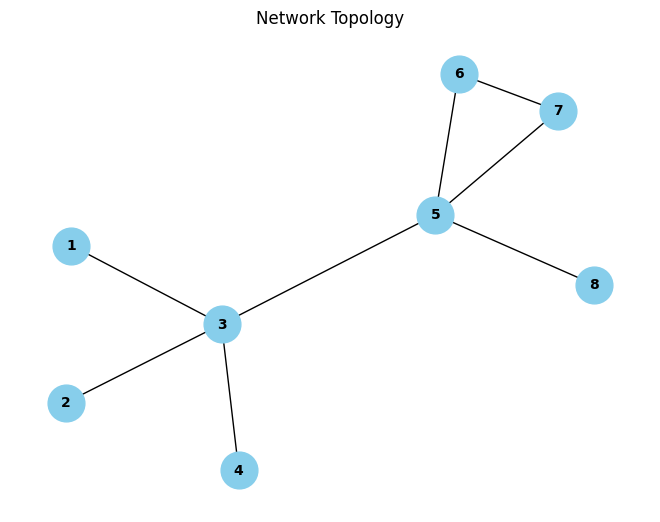

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

# Add edges
edges = [(1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7), (5, 8), (6, 7)]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Show the graph
plt.title("Network Topology")
plt.show()

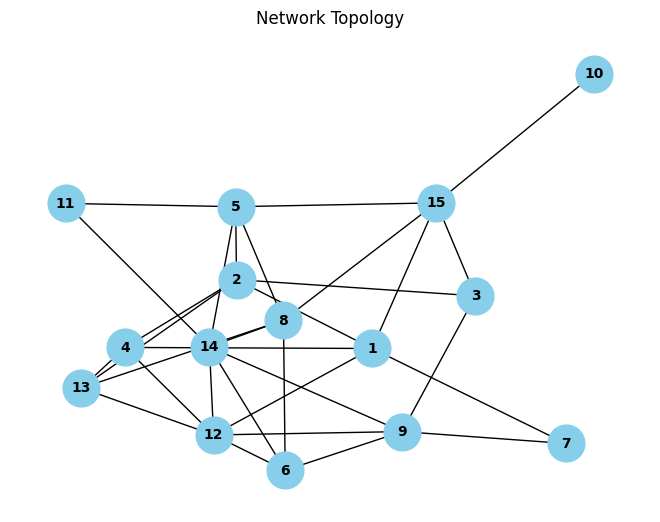

In [3]:
import random

def generate_network_topology(num_nodes):
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(1, num_nodes + 1))

    # Create connections based on the specified topology
    for i in range(1, num_nodes + 1):
        connected_to = random.sample(range(1, num_nodes + 1), random.randint(1, min(4, num_nodes)))
        if i in connected_to:
            connected_to.remove(i)  # Remove self-connections if present
        for node in connected_to:
            G.add_edge(i, node)

    return G

# Generate a network with 8 nodes
num_nodes = 15
network = generate_network_topology(num_nodes)

# Draw the graph
pos = nx.spring_layout(network)  # positions for all nodes
nx.draw(network, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Show the graph
plt.title("Network Topology")
plt.show()

In [4]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print betweenness centrality for each node
print("Node\tBetweenness Centrality")
for node, centrality in betweenness_centrality.items():
    print(f"{node}\t{centrality:.4f}")

important_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0]
nds = []
centr = []
for n, c in betweenness_centrality.items():
    nds.append(n)
    centr.append(c)
centr


Node	Betweenness Centrality
1	0.0000
2	0.0000
3	0.7143
4	0.0000
5	0.6667
6	0.0000
7	0.0000
8	0.0000


[0.0, 0.0, 0.7142857142857142, 0.0, 0.6666666666666666, 0.0, 0.0, 0.0]

In [5]:
# Normalize betweenness centrality to get probabilities
total_centrality = sum(betweenness_centrality.values())
sampling_probabilities = {node: centrality / total_centrality for node, centrality in betweenness_centrality.items()}

# Print sampling probabilities of each node
for node, probability in sampling_probabilities.items():
    print(f"Node {node}: Sampling Probability = {probability}")




Node 1: Sampling Probability = 0.0
Node 2: Sampling Probability = 0.0
Node 3: Sampling Probability = 0.5172413793103448
Node 4: Sampling Probability = 0.0
Node 5: Sampling Probability = 0.48275862068965514
Node 6: Sampling Probability = 0.0
Node 7: Sampling Probability = 0.0
Node 8: Sampling Probability = 0.0


add an epsilon for each betweenness centrality in order to not have sampling probability = 0

In [6]:
# Import the required module
from networkx.algorithms.community import greedy_modularity_communities

# Find the communities in the graph
communities = greedy_modularity_communities(G)

# Print the communities
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({1, 2, 3, 4})
Community 2: frozenset({8, 5, 6, 7})


In [8]:
def greedy_partition_coloring(G, sampling_probabilities, k):
    # Sort nodes by decreasing sampling probabilities
    sorted_nodes = sorted(G.nodes(), key=lambda x: sampling_probabilities[x], reverse=True)

    partition = [[] for _ in range(k)]  # Initialize partition

    # Assign each node to a set (color) greedily
    for node in sorted_nodes:
        # Find the set (color) with the least number of nodes
        min_set_index = min(range(k), key=lambda i: len(partition[i]))
        # Add the node to the chosen set
        partition[min_set_index].append(node)

    return partition

# Example usage: Partition the network into 2 disjoint sets using coloring algorithm
partition_coloring = greedy_partition_coloring(G, sampling_probabilities, 5)
print("Partitioned Sets using Coloring Algorithm:")
for i, part in enumerate(partition_coloring):
    print(f"Set {i+1}: {part}")

Partitioned Sets using Coloring Algorithm:
Set 1: [3, 6]
Set 2: [5, 7]
Set 3: [1, 8]
Set 4: [2]
Set 5: [4]


In [9]:
def greedy_partition_coloring(G, sampling_probabilities, k):
    # Sort nodes by decreasing sampling probabilities
    sorted_nodes = sorted(G.nodes(), key=lambda x: sampling_probabilities[x], reverse=True)

    partition = []  # Initialize partition

    # Assign each node to a set (color) greedily
    for node in sorted_nodes:
        for part in partition:
            # Check if the node has any neighbors in the current set
            if not any(neighbor in part for neighbor in G.neighbors(node)):
                # If not, add the node to the set and break the loop
                part.append(node)
                break
        else:
            # If the node was not added to any set, add it to a new set
            partition.append([node])

    return partition

In [10]:
partition_coloring = greedy_partition_coloring(G, sampling_probabilities, 5)
print("Partitioned Sets using Coloring Algorithm:")
for i, part in enumerate(partition_coloring):
    print(f"Set {i+1}: {part}")

Partitioned Sets using Coloring Algorithm:
Set 1: [3, 6, 8]
Set 2: [5, 1, 2, 4]
Set 3: [7]


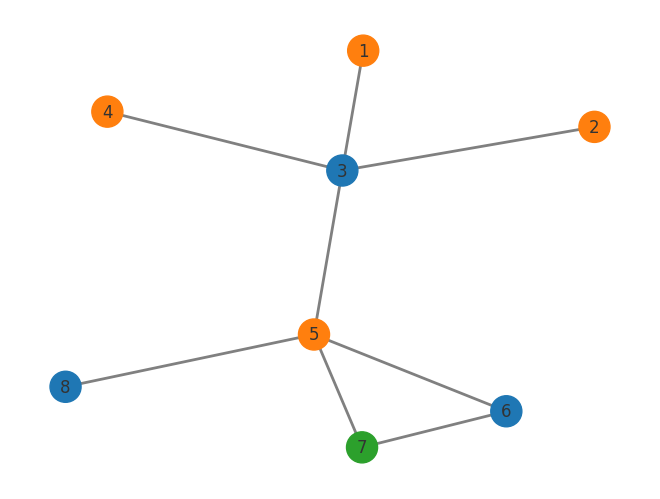

Partitioned Sets using Coloring Algorithm:
Set 1: [3, 6, 8]
Set 2: [5, 1, 2, 4]
Set 3: [7]


In [11]:
import matplotlib.colors as mpl

# Apply greedy coloring
graph_coloring = nx.greedy_color(G)
unique_colors = set(graph_coloring.values())

# Assign colors to nodes based on the greedy coloring
graph_color_to_mpl_color = dict(zip(unique_colors, mpl.TABLEAU_COLORS))
node_colors = [graph_color_to_mpl_color[graph_coloring[n]] for n in G.nodes()]

pos = nx.spring_layout(G, seed=14)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color=node_colors,
    edge_color="grey",
    font_size=12,
    font_color="#333333",
    width=2,
)
plt.show()

print("Partitioned Sets using Coloring Algorithm:")
for i, part in enumerate(partition_coloring):
    print(f"Set {i+1}: {part}")

if they have at least one common neighbor they have to be connected in the auxiliary graph (based on the adjacency matrix), thus in the greedy algorithm they won't be in the same sets
